# Text detection and recognition on medicine Images

We build this project to detect and recognize text on madicine images

Similarity comparation is made both on text and images



Multi-lauguage will be added

In [2]:
import os
import cv2
import glob
import spacy
import time
import datetime
import data_helpers
import process_image
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import PIL
from PIL import Image
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import pillowfight
import sys
import pyocr
import pyocr.builders

%matplotlib inline
print('All tools are imported successfully')

All tools are imported successfully


In [3]:
# Next is to prepare Tesseract OCR tools
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[17]
print("-----Will use language:  '%s'" % (lang))

Will use tool 'Tesseract (sh)'
Available languages: kor, kor_vert, Thaana, kat_old, Syriac, mri, chr, ron, isl, lao, ind, mal, Arabic, Georgian, Hebrew, pol, Tamil, eng, san, jpn_vert, Japanese_vert, Oriya, oci, Fraktur, nld, mlt, lat, snd, hin, ltz, hat, Japanese, chi_tra_vert, Bengali, mya, spa, sun, msa, nep, Canadian_Aboriginal, Myanmar, srp, Cherokee, osd, cym, hun, ita_old, kir, Sinhala, chi_sim_vert, Vietnamese, iku, Cyrillic, rus, Gurmukhi, Devanagari, cat, pan, heb, que, chi_tra, Tibetan, Telugu, Malayalam, Gujarati, cos, kaz, mon, Ethiopic, syr, hrv, jav, ita, Khmer, pus, kat, Kannada, kur_ara, HanT, ces, ori, ceb, spa_old, chi_sim, slk, jpn, Latin, khm, lit, slv, swe, nor, HanS, Hangul, HanT_vert, swa, Armenian, Thai, sqi, kan, por, srp_latn, mkd, Lao, HanS_vert, hye, sin, lav, Hangul_vert, mar, Greek
-----Will use language:  'eng'


In [4]:
#-Load all images files for detection
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 
files_grabbed = []
for files in ftypes:
    files_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(files_grabbed)) + ' images loaded')

There are 99 images loaded


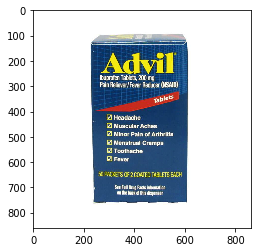

In [5]:
# Get some images to show
randindex = randint(0, len(files_grabbed)-1)
img = cv2.imread(files_grabbed[randindex])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
#Detect and recognize text on image
txt = tool.image_to_string(Image.fromarray(img), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(txt)

print('------Following is cleaned text------')
print(data_helpers.process_raw(txt))

------Following is raw text------
Advil

DU CUM EL saan it
Pain Reliever/ Fever aie TT)

——

PAM sole ET)

am erat ta Coil)

Minor Pain of Arthritis
Pa Cat ctr Meet) ss)

Pa Cert)

Fever

SUELO PAHO NAME Maby a, (0

Beer
PCs
------Following is cleaned text------
advildu cum el saan itpain reliever/ fever aie tt)——pam sole et)am erat ta coil)minor pain of arthritispa cat ctr meet) ss)pa cert)feversuelo paho name maby a, (0beerpcs


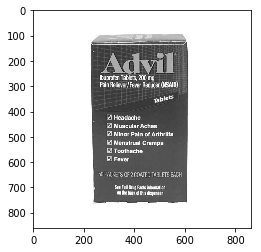

In [7]:
newimg = process_image.improve(files_grabbed[randindex])
newimgshow = cv2.cvtColor(newimg, cv2.COLOR_GRAY2RGB)
plt.imshow(newimgshow)

In [8]:
#Detect and recognize text on image
txt = tool.image_to_string(Image.fromarray(newimg), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(txt)

print('------Following is cleaned text------')
print(data_helpers.process_raw(txt))

------Following is raw text------
Advil
Ibuprofen Tablets, 200 mg
Pain Reliever/ Fever Reducer (NSAID)

PP le

PAM a oTe To}

agra La (ent)
Pana Re Uy
PPA Cats ctl Rese tu) s)-3

WM Toothache

old

| 50 PACKETS OF 2 COATED TABLETS EACH

Ae eu
Ce uss cg
------Following is cleaned text------
advilibuprofen tablets, 200 mgpain reliever/ fever reducer (nsaid)pp lepam a ote to}agra la (ent)pana re uyppa cats ctl rese tu) s)-3wm toothacheold| 50 packets of 2 coated tablets eachae euce uss cg


In [9]:
#Following we write all recognize all images and write to database.
print('Following we write all recognize all images \n and write all text to database.')
with open ('result.txt', 'w', encoding = 'utf-8') as output:
    count = 1
    for f in files_grabbed:
        newimg = process_image.improve(f)
        txt = tool.image_to_string(Image.fromarray(newimg), lang=lang, builder=pyocr.builders.TextBuilder())
        #txt = pyocr.libtesseract.image_to_string(Image.open(f), lang=lang, builder=pyocr.builders.TextBuilder())
        cleantxt = data_helpers.process_raw(txt)
        #head, tail = os.path.split(f)
        #output.write(tail + '\n')
        output.write(cleantxt + '\n')
        time_str = datetime.datetime.now().isoformat()
        print("{}: image {} processed, total {:g}".format(time_str, count, len(files_grabbed)))
        #print('image ' + str(count) + '/' + str(len(files_grabbed)) + ' is processed')
        count += 1
        #if len(cleantxt) > 7:
        #    print('Image ' + str(count) + ' is processed:  ' + cleantxt)
        #    count += 1

Following we write all recognize all images 
 and write all text to database.
2018-07-23T09:47:00.813585: image 1 processed, total 99
2018-07-23T09:47:01.463882: image 2 processed, total 99
2018-07-23T09:47:02.707565: image 3 processed, total 99
2018-07-23T09:47:04.718516: image 4 processed, total 99
2018-07-23T09:47:05.923462: image 5 processed, total 99
2018-07-23T09:47:08.310069: image 6 processed, total 99
2018-07-23T09:47:09.429418: image 7 processed, total 99
2018-07-23T09:47:10.960552: image 8 processed, total 99
2018-07-23T09:47:12.887584: image 9 processed, total 99
2018-07-23T09:47:13.592900: image 10 processed, total 99
2018-07-23T09:47:14.370792: image 11 processed, total 99
2018-07-23T09:47:15.819991: image 12 processed, total 99
2018-07-23T09:47:17.072257: image 13 processed, total 99
2018-07-23T09:47:17.931856: image 14 processed, total 99
2018-07-23T09:47:18.837906: image 15 processed, total 99
2018-07-23T09:47:20.080934: image 16 processed, total 99
2018-07-23T09:47:25

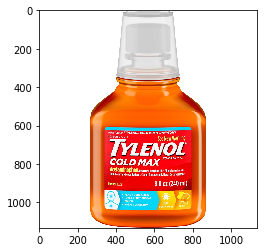

In [10]:
#Loat the test image
test_img = cv2.imread('3.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

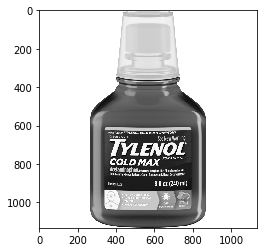

In [12]:
gray_test = process_image.improve('3.jpg')
gray_test = cv2.cvtColor(gray_test, cv2.COLOR_GRAY2RGB)
plt.imshow(gray_test)

In [13]:
test_txt = tool.image_to_string(Image.fromarray(gray_test), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(test_txt)

print('------Following is cleaned text------')
clean_test = data_helpers.process_raw(test_txt)
print(clean_test)

------Following is raw text------
CN TE Coy M oY TU Ske) ae

a TR

ey eV ae

COLD MAX

OU EE eT a

Pain Reliever-Fever Reducer, Cough Suppressant, Nasal Decongestant

Tonnes 8 fl oz (240 ml)

I
------Following is cleaned text------
cn te coy m oy tu ske) aea trey ev aecold maxou ee et apain reliever-fever reducer, cough suppressant, nasal decongestanttonnes 8 fl oz (240 ml)i


In [14]:
with open('result.txt', 'r') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
print(len(content))
print(content[5])

99
ndc 0220-9325-04su hoarsenessred, dry and sore throat’throatcalmhomeopathic medicine  = non-drowsy@ no known drug interactions@ melts under your tongue  cpv aequick-dissolvingbo .@ n° tabletsmoya cs ete th) neen ec len ects


31
33
21
24
24
20
27
20
34
31
18
28
30
36
25
24
39
26
46
41
25
0
28
25
35
0
30
37
0
0
29
24
27
0
41
23
20
28
36
32
23
41
38
29
26
0
9
37
24
42
29
0
35
35
0
0
39
26
19
20
18
17
36
29
28
23
41
20
72
17
23
36
14
23
36
0
26
34
0
31
0
42
35
20
35
0
0
28
0
35
26
31
26
0
25
30
67
43
36


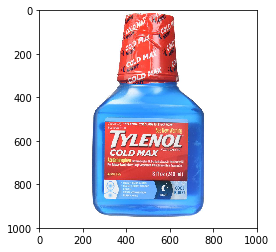

In [15]:
# get the maximum similar image
max_ratio, target = 0, 0
for index, val in enumerate(content):
    ratio = fuzz.partial_ratio(val, clean_test)
    if ratio > max_ratio:
        max_ratio = ratio
        target = index 
    print(str(ratio))
    
target_img = cv2.imread(files_grabbed[target])
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
plt.imshow(target_img)